In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw03.ipynb")

# Homework 3: Text Analysis of Bloomberg Articles

## Data Cleaning and EDA

### Due Date: Thursday, February 15, 11:59 PM

You must submit this assignment to Gradescope by the on-time deadline, Thursday, February 15, at 11:59 PM. Please read the syllabus for the grace period policy. No late submissions beyond the grace period will be accepted. **We strongly encourage you to submit your work to Gradescope several hours before the stated deadline.** This way, you will have ample time to reach out to staff for support if you encounter difficulties with submission. While course staff is happy to help guide you with submitting your assignment ahead of the deadline, we will not respond to last-minute requests for assistance.

Please read the instructions carefully when submitting your work to Gradescope.

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the homework, we ask that you **write your solutions individually**. If you do discuss the assignments with others, please **include their names** below.


**Collaborators**: _list collaborators here_


## This Assignment

Welcome to Homework 3! For this assignment, we will work with Bloomberg news articles on Microsoft and Microsoft stock data (MSFT).

In this assignment, you will gain practice with:

- Conducting data cleaning and EDA on a text-based dataset,
- Manipulating data in `pandas` with the `datetime` and `string` accessors,
- Writing regular expressions and using `pandas` RegEx methods, and
- Performing sentiment analysis on text using DistilBERT.


In [2]:
# Run this cell to set up your notebook. 
import warnings
warnings.simplefilter(action="ignore")

import re
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ds100_utils import *

# Ensure that pandas shows at least 280 characters in columns, so we can see full articles.
pd.set_option("max_colwidth", 280)
plt.style.use("fivethirtyeight")
sns.set()
sns.set_context("talk")

In this assignment, we will use the DistilBERT model, which is a Natural Language Processing (NLP) model designed to understand human language by processing text to capture the context and meaning of words within sentences. You are not expected to know the details of the model, but we will use it in this homework to perform sentiment analysis on textual data. We are importing those tools and the corresponding model below. **If you see any warnings, please ignore them. As long as the cell runs, it shouldn't be any issues.**

In [3]:
from transformers import pipeline
model_checkpoint = "distilbert/distilbert-base-uncased-finetuned-sst-2-english"

2024-02-15 22:36:24.269004: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Score Breakdown

Question | Manual| Points
--- |---| ---
1a |No| 1
1b |No| 1
1c |No| 3
1d |Yes| 1
2a |No| 2
2b |No| 1
2c |No| 2
2di |No| 1
2dii |Yes| 1
3ai |No| 1
3aii |No| 1
3b |No| 2
3ci |No| 1
3cii |Yes| 1
**Total** | **3** | **19**

## Before You Start

For each question in the assignment, please write down your answer in the answer cell(s) right below the question.

We understand that it is helpful to have extra cells breaking down the process towards reaching your final answer. If you happen to create new cells below your answer to run code, **NEVER** add cells between a question cell and the answer cell below it. It will cause errors when we run the autograder, and it will sometimes cause a failure to generate the PDF file.

**Important note: The local autograder tests will not be comprehensive. You can pass the automated tests in your notebook but still fail tests on Gradescope after the grades are released.** Please be sure to check your results carefully.

Finally, unless we state otherwise, **do not use for loops or list comprehensions**. The majority of this assignment can be done using built-in commands in `pandas` and `NumPy`.

### Debugging Guide

If you run into any technical issues, we highly recommend checking out the [Data 100 Debugging Guide](https://ds100.org/debugging-guide/). In this guide, you can find general questions about Datahub, Gradescope, and common `pandas` and RegEx errors.


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Question 1: Importing the Data

The data for this assignment is a subset of the financial news dataset from [this github repo](https://github.com/philipperemy/financial-news-dataset). The original datasets are no longer available online due to copyright issues, but we were allowed access for educational purposes. The data in the file `data/msft_bloomberg_news.txt` has been filtered to just Bloomberg articles published between 2010 to 2013 (inclusive) with text that contains "Microsoft" or "MSFT" (Microsoft's stock name).


<br>

---

### Question 1a

Let's examine the contents of the `data/msft_bloomberg_news.txt` file. Using the [`open` function](https://docs.python.org/3/library/functions.html#open) and [`read` operation](https://docs.python.org/3/tutorial/inputoutput.html#methods-of-file-objects) on a `python` file object, read **the first 1000 characters** in `data/msft_bloomberg_news.txt` and store your result in the variable `q1a`. Then, display the result so you can read it.

**CAUTION: Viewing the contents of large files in a Jupyter Notebook could crash your browser. Be careful not to print the entire contents of the file.**


In [4]:
file = open("data/msft_bloomberg_news.txt")
q1a = file.read(1000)

print(q1a)

[{"id":46243185,"title":"Opera Jumps Most Ever After Report Facebook May Bid: Oslo Mover","released_at":"<date>May 29 2012<\/date> <time>09:40:58<\/time>","content":"Opera Software ASA (OPERA) , the Norwegian\nmarker of Internet browsers, surged the most on record in Oslo\nafter technology website  Pocket-Lint  reported that  Facebook Inc. (FB) \nmay try to acquire the company.  Opera gained as much as 26 percent, the biggest jump since\nit first sold shares in 2004. The Oslo-based company rose 18\npercent to 40.5 kroner at 11:37 a.m., giving it a market value\nof 4.85 billion kroner ($807 million).  Opera is the last major independent browser left, with the\nothers owned by companies such as  Microsoft Corp. (MSFT) ,  Google Inc. (GOOG)  \nand  Apple Inc. (AAPL) , said Aleksander Nilsen, an analyst at Abg Sundal\nCollier in Oslo. The company has a strong balance sheet, and\ncould be an attractive target for other companies, such as\n Mountain View , California-based Google, he said.  

In [5]:
grader.check("q1a")

q1a results: All test cases passed!

<br>

---

### Question 1b

Based on the printed output you got from `q1a`, what format is the data in? Answer this question by entering the letter corresponding to the right format in the variable `q1b` below.

**CAUTION: As a reminder, viewing the contents of large files in a Jupyter Notebook could crash your browser. Be careful not to print the entire contents of the file, and do not use the file explorer to open data files directly.**

**A.** CSV<br/>
**B.** HTML<br/>
**C.** JavaScript Object Notation (JSON)<br/>
**D.** Excel XML

Answer in the following cell. Your answer should be a string, either `"A"`, `"B"`, `"C"`, or `"D"`.


In [6]:
q1b = 'C'

In [7]:
grader.check("q1b")

q1b results: All test cases passed!

<br>

---

### Question 1c

`pandas` has built-in readers for many different file formats, including the file format used here to store news articles. To learn more about these, check out the documentation for

- `pd.read_csv` [(docs)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
- `pd.read_html`[(docs)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)
- `pd.read_json`[(docs)](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html)
- `pd.read_excel`[(docs)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html).

For this question, use one of these functions to:
1. Load the file `msft_bloomberg_news.txt` in the data folder as a `DataFrame` into the variable `msft_news_df`.
2. Set the **index** of `msft_news_df` to correspond to the `id` of each news article.


**Hint:** If your code is taking a while to run, you should review your answers to `q1a` and `q1b`; you may have used the incorrect data loading function for the type of the given file.

In [8]:
msft_news_df = pd.read_json("data/msft_bloomberg_news.txt")
msft_news_df.set_index("id", inplace=True) 
msft_news_df.head(1)

,title,released_at,content,path
id,,,,
46243185,Opera Jumps Most Ever After Report Facebook May Bid: Oslo Mover,<date>May 29 2012</date> <time>09:40:58</time>,"Opera Software ASA (OPERA) , the Norwegian\nmarker of Internet browsers, surged the most on record in Oslo\nafter technology website Pocket-Lint reported that Facebook Inc. (FB) \nmay try to acquire the company. Opera gained as much as 26 percent, the biggest jump since\n...",./2008_2012_msft_bloomberg_news/opera-jumps-most-on-record-after-report-of-facebook-s-interes.txt


In [9]:
grader.check("q1c")

q1c results: All test cases passed!

<!-- BEGIN QUESTION -->

<br>

---

### Question 1d

Suppose we are interested in using the news to predict future stock values. What additional data would we need to predict stock prices, and how could we connect that data to news articles? In addition, what attributes or characteristics of the news might help predict the stock value? 

We would need data with company names, their corresponding stock symbol, their corresponding stock price, and the dates/times for those stock prices. We could connect that data to the news articles by parsing the content or title of the news articles for the stock symbol or company name, for example "(OPERA"), and creating a new column in the news dataframe with the stock symbols that are referred to in the article. Then, we can merge based off the stock symbol.

In addition, the released_at attribute of the news would be helpful to predict stock value, as we would like to see the stock prices before and after the released_at date of the news to see if there is a trend between the news and the stock prices

<!-- END QUESTION -->

<br/>

<hr style="border: 1px solid #fdb515;" />

## Question 2: Time Analysis

After loading in the data, we can start exploring news articles by analyzing the relationships between the release dates (date of publication) and different topics and companies.

<br>


---

### Question 2a

First, let's extract the date and time from the `released_at` column in `msft_news_df`. Notice that the date and time are encoded in the following format:

```
<date>May 29 2012</date> <time>09:40:58</time>
<date>May 18 2011</date> <time>22:42:40</time>
<date>August 15 2012</date> <time>00:09:02</time>
<date>July 1 2011</date> <time>22:12:37</time>
...
```

There are several ways to convert this to a `Timestamp` object that we can use more easily. However, for this assignment, we are going to use string manipulation functions. 

Create a regular expression that extracts the Month, Day, Year, Hour, Minute, and Second from the `msft_news_df["released_at"]` column. You should create a new `DataFrame` called `dates` that contains:
1. The same index as `msft_news_df` (`id`) and
2. Column labels: `"Month"`, `"Day"`, `"Year"`, `"Hour"`, `"Minute"`, `"Second"`.

Additionally, convert all numerical values (`"Year"`, `"Day"`, `"Hour"`, `"Minute"`, `"Second"`) to type `int`.

**Hint 1:** You should use the [`Series.str.extract`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html) function.

**Hint 2:** Don't forget to use raw strings and capture groups. Copy the above example text into [regex101.com](https://regex101.com/) to experiment with your regular expressions.

**Hint 3:** It might be helpful to break this up into a couple of steps (e.g., first extract date values such as Month, Day, and Year and then extract time values such as Hour, Minute, and Second).

In [10]:
date = msft_news_df["released_at"].str.extract("(\w+ \d+ \d+)", expand=False)
# display(date)
month = date.str.extract("(\w+)", expand=False)
# display(month)
day = date.str.extract("(\d+)", expand=False).astype("int")
# display(day)
year = date.str.extract("(\d{4})", expand=False).astype("int")
# display(year)

time = msft_news_df["released_at"].str.extract("(\d\d:\d\d:\d\d)", expand=False)
# display(time)
# time["str_len"] = time[0].str.len()
# display(time)
# time["str_len"].value_counts()
hour = time.str.slice(start=0, stop=2).astype("int")
# display(hour)
minute = time.str.slice(start=3, stop=5).astype("int")
# display(minute)
second = time.str.slice(start=6).astype("int")
# display(second)

dates = pd.DataFrame({
    "Month":month,
    "Day":day,
    "Year":year,
    "Hour":hour,
    "Minute":minute,
    "Second":second
    }
)
dates

,Month,Day,Year,Hour,Minute,Second
id,,,,,,
46243185,May,29,2012,9,40,58
73522879,May,18,2011,22,42,40
29296500,August,15,2012,0,9,2
49799724,July,1,2011,22,12,37
20739032,January,18,2012,1,20,28
...,...,...,...,...,...,...
75325873,June,27,2012,0,35,58
49071474,September,24,2013,13,38,57
12417018,September,14,2011,4,1,0


In [11]:
grader.check("q2a")

q2a results: All test cases passed!

<br>

---

### Question 2b

Now that we've figured out how to extract dates, create a new `DataFrame` called `msft_news_2010` that only contains articles released in 2010. This `DataFrame` should contain:
1. An index of `id` and
2. Columns: `"title"`, `"released_at"`, `"content"`, `"path"`, `"Month"`, `"Day"`, and `"Year"`.

**Hint:** Consider merging `msft_news_df` with `dates`.

In [12]:
year_bool = dates["Year"] == 2010 
# year_bool
dates_only = dates[["Month", "Day", "Year"]]
msft_news_2010 = msft_news_df.merge(dates_only, left_index=True, right_index=True)
msft_news_2010 = msft_news_2010[year_bool]

msft_news_2010.head(10)

,title,released_at,content,path,Month,Day,Year
id,,,,,,,
95357231,Netflix Profit Jumps 44% on New Users,<date>April 21 2010</date> <time>23:52:36</time>,"Netflix Inc. said first-quarter\nprofit rose 44 percent as the movie subscription service signed\nup new customers and increased online offerings. \n Net income advanced to $32.3 million, or 59 cents a share,\nfrom $22.4 million, or 37 cents, a year earlier, the Los Gatos,\n...",./2008_2012_msft_bloomberg_news/netflix-quarterly-profit-increases-44-as-movie-rental-service-adds-users.txt,April,21,2010
75227517,"Republican Win May Be Tax Boon for Companies, High Incomes",<date>November 3 2010</date> <time>16:46:00</time>,"Americans with the highest incomes\nand U.S. corporations, especially those with international\noperations, stand to be big winners as newly elected\ncongressional Republicans signal they will extend existing tax\nbenefits and push for new ones. Republicans will use their ne...",./2008_2012_msft_bloomberg_news/republican-sweep-may-mean-tax-boon-for-u-s-multinationals-high-incomes.txt,November,3,2010
57850804,Alibaba Says It Now Offers Sohu’s Search Engine,<date>October 29 2010</date> <time>12:23:43</time>,"Alibaba Group Holding Ltd. said\nusers of its search-engine service may now access technology\nsupplied by Sohu.com Inc. , as the two Chinese companies \nstrengthen collaboration to challenge industry leader Baidu Inc. Users of Alibaba’s Etao.com search service may now o...",./2008_2012_msft_bloomberg_news/alibaba-says-it-now-offers-sohu-s-search-engine.txt,October,29,2010
75532360,Slim Solution for Trade Imbalances Is More Buying by China,<date>October 31 2010</date> <time>16:05:40</time>,"Billionaire Carlos Slim , the world’s\nrichest man, said China must buy more and the U.S. needs to step\nup private investment to reduce the trade imbalance and boost\ntheir economies. Global currency devaluation efforts will fail in the\nabsence of economic policies that f...",./2008_2012_msft_bloomberg_news/slim-solution-for-trade-imbalances-is-more-buying-by-china-u-s-investing.txt,October,31,2010
10176588,"S&P 500 to Defy `New Normal' and Rally 17%, Cambiar's Barish Says",<date>December 1 2010</date> <time>20:38:58</time>,"Energy and industrial companies will\nrise next year, propelling a 17 percent gain in the Standard &\nPoor’s 500 Index from its current level, according to Cambiar\nInvestors LLC’s Brian Barish . Next year will be marked by a “multi-speed recovery” as\nindustries weakened b...",./2008_2012_msft_bloomberg_news/s-p-500-to-defy-pimco-s-new-normal-rise-17-by-end-of-2011-barish-says.txt,December,1,2010
14908050,"Microsoft, Google Take Battle for Online Ad Dollars to Cannes",<date>June 23 2010</date> <time>22:01:00</time>,"Microsoft Corp. , Yahoo! Inc. and\n Google Inc. have taken their battle to become the online\nadvertiser of choice to the sandy shores of Cannes, wining,\ndining and making pitches to the world’s biggest ad agencies. \n The technology companies are fighting for a chunk of...",./2008_2012_msft_bloomberg_news/icrosoft-hosts-cannes-beach-club-yahoo-hands-out-freebies-in-ad-rivalry.txt,June,23,2010
85610438,The Disruptors of the Decade,<date>January 14 2010</date> <time>21:45:55</time>,"Near the end of December, I created a survey with a single question: ""Which companies do you think have done the best job of driving growth through disruption — transforming what exists or creating what doesn't through simplicity, convenience, affordability or accessibility ...",./2008_2012_msft_bloomberg_news/e-disruptors-of-the-decade.txt,January,14,2010
24570465,Swiss Stocks Rise for First Time in Seven Days; Lonza Gains,<date>October 5 2010</date> <time>15:54:47</time>,"Swiss stocks rose for the first time\nin seven days as gains in Lonza Group AG and Roche Holding AG \nlifted the benchmark Swiss Market Index. Lonza, the world’s largest maker of drug ingredients,\nclimbed 3.2 percent, while drugmaker Roche advanced 2 percent.\n UBS AG r...",./2008_2012_m

In [13]:
grader.check("q2b")

q2b results: All test cases passed!

<br>

---

### Question 2c

After processing the article release dates, we can analyze articles about different topics and companies. Note that all the articles in the provided dataset mention Microsoft/MSFT, but they can also mention other companies.


For each company in the list of `companies` (provided below), add a boolean column to the `msft_news_df` `DataFrame` indicating whether the corresponding company is mentioned in the text of the article. Ultimately, you should add six new columns containing `True`/`False` values to the `DataFrame`: `"amazon"`, `"nintendo"`, `"apple"`, `"sony"`, `"facebook"`, `"netflix"`. You may use a for loop over the list of companies.

**Note:** Make the contents of the articles lowercase before searching for the keywords.

In [14]:
companies = ["amazon", "nintendo", "apple", "sony", "facebook", "netflix"]

for company in companies:
    msft_news_df[company] = (msft_news_df["content"].str.lower()
                             .str.contains(company)
                            )

msft_news_df.head(10)

,title,released_at,content,path,amazon,nintendo,apple,sony,facebook,netflix
id,,,,,,,,,,
46243185,Opera Jumps Most Ever After Report Facebook May Bid: Oslo Mover,<date>May 29 2012</date> <time>09:40:58</time>,"Opera Software ASA (OPERA) , the Norwegian\nmarker of Internet browsers, surged the most on record in Oslo\nafter technology website Pocket-Lint reported that Facebook Inc. (FB) \nmay try to acquire the company. Opera gained as much as 26 percent, the biggest jump since\n...",./2008_2012_msft_bloomberg_news/opera-jumps-most-on-record-after-report-of-facebook-s-interes.txt,False,False,True,False,True,False
73522879,Microsoft Calls Intel’s Comments on Next Windows ‘Inaccurate’,<date>May 18 2011</date> <time>22:42:40</time>,"Microsoft Corp. (MSFT) said comments made by\nan Intel Corp. (INTC) executive yesterday about future version of its\nWindows operating system were “factually inaccurate and\nunfortunately misleading.” Renee James, head of Intel’s software business, said\nyesterday that Mi...",./2008_2012_msft_bloomberg_news/icrosoft-calls-intel-s-comments-on-next-windows-inaccurate-.txt,False,False,False,False,False,False
29296500,Lawyers Raking in Cash as Campaign Spending Hits Records,<date>August 15 2012</date> <time>00:09:02</time>,"Every four years, a new mix of politicians assembles to compete for the opportunity to run for president. While the candidates’ names and faces change, the lawyers stay the same. Attorney Michael Toner began his presidential-campaign legal career in 1996 working for Republic...",./2008_2012_msft_bloomberg_news/awyers-raking-in-cash-as-campaign-spending-hits-records.txt,False,False,False,False,False,False
49799724,"Microsoft, Google Sued by Louisiana Firm Over Computer-Mapping Technology",<date>July 1 2011</date> <time>22:12:37</time>,"Microsoft Corp. (MSFT) and Google Inc. (GOOG) were\naccused of violating a Louisiana company’s patent covering\nmapping technology that helps computer users see locations in\nthree dimensions. Officials of Transcenic Inc. contend in a lawsuit that\nexecutives of Google,...",./2008_2012_msft_bloomberg_news/icrosoft-google-sued-over-technology-providing-computer-maps.txt,False,False,False,False,False,False
20739032,Yahoo Co-Founder Jerry Yang Exits Company,<date>January 18 2012</date> <time>01:20:28</time>,"Jerry Yang is exiting the Yahoo!\nInc (YHOO) . board and its management team, the latest casualty of an\noverhaul that led to the ouster of Chief Executive Officer Carol\nBartz and left the company in search of strategic options. Yang, who started Yahoo in 1995 with Dav...",./2008_2012_msft_bloomberg_news/yahoo-says-co-founder-jerry-yang-resigns.txt,False,False,False,False,True,False
10349820,Nokia’s Debt Rating Cut to Two Steps Above Junk by Moody’s,<date>July 27 2011</date> <time>12:07:33</time>,"Nokia Oyj (NOK1V) , the world’s biggest maker\nof mobile phones, had its debt rating cut to two steps above\njunk by Moody’s Investors Service, which cited “a severe\nweakening” of the Finnish company’s market position. The senior debt rating was reduced by two steps to Baa2...",./2008_2012_msft_bloomberg_news/nokia-debt-cut-to-two-grades-above-junk-by-moody-s-with-negative-outlook.txt,False,False,False,False,False,False
97497776,Google Said to Negotiate With Government on Data Requests,<date>June 15 2013</date> <time>02:18:12</time>,"Google Inc. (GOOG) and Facebook Inc. (FB) are\nholding discussions with the U.S. government to disclose more\ninformation about national-security requests, people with\nknowledge of the matter said. The people asked not to be identified because the talks\naren’t public. T...",./2008_2012_msft_bloomberg_news/google-said-to-negotiate-with-government-on-data-requests.txt,False,False,True,False,True,False
95357231,Netflix Profit Jumps 44% on New Users,<date>April 21 2010</date> <time>23:52:36</time>,"Netflix Inc. said first-quarter\nprofit rose 44 percent as the movie subscription service signed\nup new customers and increased online o

In [15]:
grader.check("q2c")

q2c results: All test cases passed!

<br>

---

### Question 2d

Now, we can put everything together to analyze the release dates and volume of articles for different companies.


#### Question 2d, Part i

Create a new `DataFrame` called `year_news` that contains the number of articles mentioning each company in the list `companies` after 2010 (inclusive). `year_news` should have six columns (one column for each company), and the index of this `DataFrame` should be the release year `"Year"`.

In [16]:
msft_news_dates = msft_news_df.merge(dates_only, left_index=True, right_index=True)
msft_news_dates = msft_news_dates[msft_news_dates["Year"] >= 2010]
companies_and_year = companies.copy()
companies_and_year.append("Year")
company_mentions_past_2010 = msft_news_dates[companies_and_year]
# company_mentions_past_2010

year_news = company_mentions_past_2010.groupby("Year").sum()
year_news.head()

,amazon,nintendo,apple,sony,facebook,netflix
Year,,,,,,
2010,41,28,190,55,74,9
2011,101,29,477,104,158,43
2012,179,44,766,97,271,40
2013,152,93,687,196,238,51


In [17]:
grader.check("q2di")

q2di results: All test cases passed!

<!-- BEGIN QUESTION -->

#### Question 2d, Part ii

Given your code in the previous part is correct, after running the cell below, you should be able to see the number of articles released mentioning `companies` for each year. The plot should look like this:
<center>
<img src = "images/num_articles.png" width = "500">
</center>

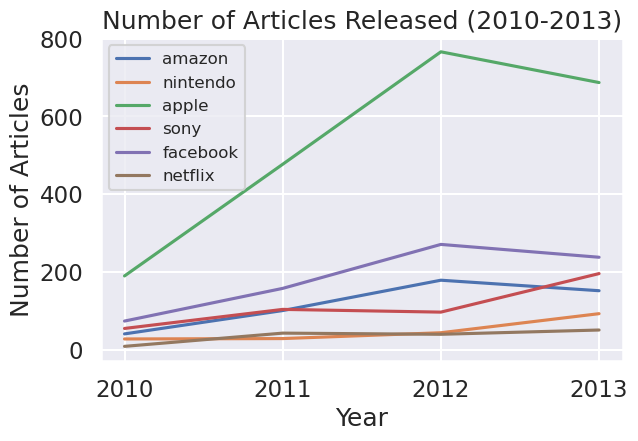

In [18]:
plt.figure(figsize=(6, 4))

for company in companies:
    sns.lineplot(data=year_news.reset_index(),
                 x="Year",
                 y=company,
                 label=company)
plt.legend(fontsize="12")
plt.xticks(np.arange(2010, 2014), np.arange(2010, 2014))
plt.ylabel("Number of Articles")
plt.xlabel("Year")
plt.title("Number of Articles Released (2010-2013)");

What trends do you notice in the plot above? Feel free to reference or Google any events to explain the trends seen in the graph. What are some limitations of using data and the corresponding plot to analyze the performance of different companies or trends?

**Hint:** Remember the source of the articles and the subset of the articles we are analyzing in this assignment.

Through the years 2010-2012, there was a large increase in the number of articles mentioning the company Apple. Facebook and Amazon also had a small increase over these years, but not nearly as much as Apple. Upon Googling Steve Jobs, he died in 2011, and presumably left a lot of turmoil or speculation about the company's future. Thus, it makes sense that the number of articles mentioning Apple skyrocketed. However, just because they were mentioned more times, this does not necessarily indicate a positive trend in Apple's performance. As I recall, a lot of articles questioned how the company would function in the future, and thus not all mentions were good mentions in this scenario

<!-- END QUESTION -->

<br/>

<hr style="border: 1px solid #fdb515;" />

## Question 3: Sentiment Analysis

In this section, we will continue building on our past analysis and specifically look at the **sentiment of each article** —— this will lead us to a much more direct and detailed understanding of how these articles can be used in different applications. **Sentiment analysis** is generally the computational task of classifying the emotions in a body of text as positively or negatively charged.


We will use a fine-tuned version of the **DistilBERT** model ([github](https://github.com/huggingface/transformers/tree/main/examples/research_projects/distillation), [original paper](https://arxiv.org/abs/1910.01108)) to analyze the sentiment of Bloomberg news articles. DistilBERT is a neural network-based language model (a close relative to ChatGPT); we will use the model checkpoint specifically trained for sentiment analysis. These models are not in scope for Data 100, and we don't expect you to know how they work; take CS182: Neural Networks or Data 102: Data, Inference, and Decisions if you're interested in learning more. We are using them here to show how easy (and useful) these technologies have become.

We can use the [HuggingFace library](https://huggingface.co/) to build the sentiment analysis pipeline and load the model. [Here](https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english) is the card of the model checkpoint we will use for this assignment: the model card contains general information about the model, including the base model used, training arguments, training data, etc. Again, you don't need to know this for the course but knowing about model cards is important when you start to use these techniques in your careers.

Run the following two cells to set up the sentiment analysis pipeline and see examples of how we can get the sentiment for different strings.

In [19]:
# Load the model
sentiment_analysis = pipeline("sentiment-analysis", model=model_checkpoint)

# Get the sentiment of a given string
sentiment_1 = sentiment_analysis("I have two dogs.")
print("Example 1: " + str(sentiment_1))

sentiment_2 = sentiment_analysis("I do not have dogs.")
print("Example 2: " + str(sentiment_2))

sentiment_3 = sentiment_analysis("Fortunately, I do not have dogs to worry about.")
print("Example 3: " + str(sentiment_3))

Example 1: [{'label': 'POSITIVE', 'score': 0.9955033659934998}]
Example 2: [{'label': 'NEGATIVE', 'score': 0.9987561702728271}]
Example 3: [{'label': 'POSITIVE', 'score': 0.9975079298019409}]


As you can see, the model can determine the sentiment of phrases/sentences (not just words). The model measures the phrase's **polarity**, indicating how strongly negative or positive it is on a scale of 0 to 1.

**Note:** The output is a list, and each element of the list is a dictionary with two keys (label and score). Note that we could have gotten the sentiments of the two sentences by putting them in a list (batch) and then running the pipeline once (see the code below).


In [20]:
sentiments = sentiment_analysis(["I have two dogs.", "I do not have dogs."])
print(sentiments)

[{'label': 'POSITIVE', 'score': 0.9955033659934998}, {'label': 'NEGATIVE', 'score': 0.9987561702728271}]


---

### Question 3a

As running all the articles through the model will take a while, let's first focus on articles released in 2010. We have already filtered these articles in `q2b` and assigned them to the `DataFrame` `msft_news_2010`.

Due to model input size constraints, a maximum of 512 words (tokens), and limited computational resources on Datahub, we cannot load the full articles into the pipeline. Instead, we can look at the first sentence that mentions Microsoft in each article.

#### Question 3a, Part i

Assign `microsoft_re` to a regular expression that captures sentences referencing "microsoft" or "msft" (in lowercase). You should assume all sentences end with `.`, `?`, or `!` and that these punctuation characters are not used for any other purpose. This is of course not true in practice (e.g., this example! and 3.14), but we will often make these simplifying assumptions to enable progress in data analysis.

You should develop and test your regular expression using [regex101.com](https://regex101.com/). Here are some practice sentences.

```
have you ever worked at microsoft? i once did. microsoft is known for
their research in ai.
```


Then:
1. Canonicalize the `"content"` of the articles by converting the text to lowercase,
2. Use the `microsoft_re` regular expression to extract the first sentence mentioning "microsoft" or "msft" in each article, and 
3. Create a new column `first_sentence` in `msft_news_2010` with these values. 


**Hint 1:** `Series.str.findall` function might be useful (might take around a minute to run).

**Hint 2:** Consider using the negation character class `r"[^.!?]"`

**Hint 3:** Some sentences will wrap across lines and the `.` will not match across new lines. 

In [21]:
microsoft_re = r'([^.?!]*?(?:microsoft|msft)(?:.|\s)*?[.?!])'
msft_news_2010["first_sentence"] = (msft_news_2010["content"].
                                    str.lower()
                                    .str.extract(microsoft_re)
                                   )
msft_news_2010.head(1)

,title,released_at,content,path,Month,Day,Year,first_sentence
id,,,,,,,,
95357231,Netflix Profit Jumps 44% on New Users,<date>April 21 2010</date> <time>23:52:36</time>,"Netflix Inc. said first-quarter\nprofit rose 44 percent as the movie subscription service signed\nup new customers and increased online offerings. \n Net income advanced to $32.3 million, or 59 cents a share,\nfrom $22.4 million, or 37 cents, a year earlier, the Los Gatos,\n...",./2008_2012_msft_bloomberg_news/netflix-quarterly-profit-increases-44-as-movie-rental-service-adds-users.txt,April,21,2010,"\n “if we had offered a pay-per-view service for new\nreleases, we would be in conflict with a broad range of\ncompanies, including wal-mart, microsoft, sony and apple,”\nhastings said."


In [22]:
grader.check("q3ai")

q3ai results: All test cases passed!

#### Question 3a, Part ii

Using the `sentiment_analysis` model, let's now determine the sentiment of the first sentence that mentions "microsoft" or "msft" for each article. Note that the model outputs both a label and a score. Provide just the score, which should be converted to a negative number if the label is "NEGATIVE". Add a new column `sentence_sentiment` to `msft_news_2010` with these values.

**Note 1:** Feel free to reference the start of `q3` to understand what `sentiment_analysis` can take in and what it outputs. `sentiment_analysis` may take 1-2 minutes to run when calculating scores for all the sentences.

**Note 2:** Given `sentiment_analysis` can take a while to run, feel free to create an additional cell when working with the sentiment scores. Once you've come up with your solution, please consolidate your code into one cell and delete the additional cell created to avoid any autograder issues.  

In [23]:
first_sentences_list = msft_news_2010["first_sentence"].to_list()
sentiments = sentiment_analysis(first_sentences_list)

sentiment_df = pd.DataFrame.from_dict(sentiments)
sentiment_df.set_index(msft_news_2010.index, inplace=True)

# display(sentiment_df.head(10))

def create_sentiment_score(single_sentiment):
    if single_sentiment['label'] == 'NEGATIVE' or 'N':
        return single_sentiment['score'] * -1
    else:
        return single_sentiment['score']

sentiment_score = sentiment_df.apply(create_sentiment_score, axis=1)

display(sentiment_score.head(1))

msft_news_2010["sentence_sentiment"] = sentiment_score

msft_news_2010.head(1)

id
95357231   -0.998621
dtype: float64

,title,released_at,content,path,Month,Day,Year,first_sentence,sentence_sentiment
id,,,,,,,,,
95357231,Netflix Profit Jumps 44% on New Users,<date>April 21 2010</date> <time>23:52:36</time>,"Netflix Inc. said first-quarter\nprofit rose 44 percent as the movie subscription service signed\nup new customers and increased online offerings. \n Net income advanced to $32.3 million, or 59 cents a share,\nfrom $22.4 million, or 37 cents, a year earlier, the Los Gatos,\n...",./2008_2012_msft_bloomberg_news/netflix-quarterly-profit-increases-44-as-movie-rental-service-adds-users.txt,April,21,2010,"\n “if we had offered a pay-per-view service for new\nreleases, we would be in conflict with a broad range of\ncompanies, including wal-mart, microsoft, sony and apple,”\nhastings said.",-0.998621


In [24]:
grader.check("q3aii")

q3aii results: All test cases passed!

<br>

---

### Question 3b

We can now turn to an alternative, more accurate way of determining the sentiment score of articles —— getting the sentiment based on the entire text, rather than getting sentiment based on the first sentence including "microsoft" or "msft" in the text. Let's load in `data/article_sentiment_logs.csv`, which contains sentiment scores of the full articles as a `DataFrame` `full_sentiments`. In this file, you are provided with logs which include the `id`, `score`, and `label` ("N" for "NEGATIVE" and "P" for "POSITIVE") in the following format: 

```
<device:1> <id:77243971> <result: [0.9963290095329285 (N)]>
<device:0> <id:14799046> <result: [0.9980687499046326 (N)]>
<device:1> <id:43064156> <result: [0.997868537902832 (N)]>
<device:1> <id:29402508> <result: [0.9924335479736328 (N)]>
...
```

Run the following cell to load in the `DataFrame` and see what it contains:

In [25]:
# Run this cell; no further action is needed
full_sentiments = pd.read_csv('data/article_sentiment_logs.csv')
full_sentiments.head()

,RunNum,log
0,0,<device:0> <id:77243971> <result: [0.9963290095329285 (N)]>
1,1,<device:0> <id:14799046> <result: [0.9980687499046326 (N)]>
2,2,<device:0> <id:43064156> <result: [0.997868537902832 (N)]>
3,3,<device:0> <id:29402508> <result: [0.9924335479736328 (N)]>
4,4,<device:0> <id:71427879> <result: [0.9897157549858093 (N)]>


Using the logs, modify `full_sentiments` so it ultimately just contains the `id` and `content_score` (a number ranging from -1 to 1). Then, merge this with `msft_news_2010` so we can see the results of our two methods of calculating sentiment side by side. Assign this merged `DataFrame` to `msft_scores_2010`. After the merge, make sure that only articles from 2010 appear and that the index of the `DataFrame` is the article `id`.

**Note 1:** You need to negate the score of negatively classified articles (indicated by "N").

**Note 2:** If you run into issues when merging, you may need to reset `full_sentiments` by running the above cell again.

**Hint 1:** The articles have a primary key `id`.

**Hint 2:** Feel free to reference how you calculated sentiment scores in `q3aii`.

In [26]:
bracket_reg = r"<([^>]+)>"
id_reg = r"<id:(\d*)"
score_reg = r"<result: \["

reg = r"<id:(\d*)> <result: \[([^\s]*) \((\w)\)"

full_sentiments = (full_sentiments['log']
                   .str.extract(reg)
                   .rename(columns={0:'id', 1:"score", 2:"label"})
                  )

full_sentiments["score"] = full_sentiments["score"].astype("float64")

full_sentiments["id"] = full_sentiments["id"].astype("int")

full_sentiments = full_sentiments.set_index('id', drop=True)

display(full_sentiments.head(1))

full_sentiments_score = (full_sentiments.apply(create_sentiment_score, axis=1)
                         .rename("content_score", inplace=True)
                        )
full_sentiments_score.head(10)

msft_scores_2010 = msft_news_2010.merge(full_sentiments_score, left_index=True, right_index=True)
msft_scores_2010.head(1)

,score,label
id,,
77243971,0.996329,N


,title,released_at,content,path,Month,Day,Year,first_sentence,sentence_sentiment,content_score
id,,,,,,,,,,
95357231,Netflix Profit Jumps 44% on New Users,<date>April 21 2010</date> <time>23:52:36</time>,"Netflix Inc. said first-quarter\nprofit rose 44 percent as the movie subscription service signed\nup new customers and increased online offerings. \n Net income advanced to $32.3 million, or 59 cents a share,\nfrom $22.4 million, or 37 cents, a year earlier, the Los Gatos,\n...",./2008_2012_msft_bloomberg_news/netflix-quarterly-profit-increases-44-as-movie-rental-service-adds-users.txt,April,21,2010,"\n “if we had offered a pay-per-view service for new\nreleases, we would be in conflict with a broad range of\ncompanies, including wal-mart, microsoft, sony and apple,”\nhastings said.",-0.998621,-0.535608


In [27]:
grader.check("q3b")

q3b results: All test cases passed!

<br>

---

### Question 3c

Let's dive deeper into our two methods of calculating sentiment and analyze the accuracy of the method used in `q3b`.


#### Question 3c, Part i

Calculate the difference between `content_score` and `sentence_sentiment`. Create a new column `sentiment_difference` in our `DataFrame` `msft_scores_2010` with these values.


In [28]:
msft_scores_2010['sentiment_difference'] = msft_scores_2010["content_score"] - msft_scores_2010["sentence_sentiment"]
msft_scores_2010.head(1)

,title,released_at,content,path,Month,Day,Year,first_sentence,sentence_sentiment,content_score,sentiment_difference
id,,,,,,,,,,,
95357231,Netflix Profit Jumps 44% on New Users,<date>April 21 2010</date> <time>23:52:36</time>,"Netflix Inc. said first-quarter\nprofit rose 44 percent as the movie subscription service signed\nup new customers and increased online offerings. \n Net income advanced to $32.3 million, or 59 cents a share,\nfrom $22.4 million, or 37 cents, a year earlier, the Los Gatos,\n...",./2008_2012_msft_bloomberg_news/netflix-quarterly-profit-increases-44-as-movie-rental-service-adds-users.txt,April,21,2010,"\n “if we had offered a pay-per-view service for new\nreleases, we would be in conflict with a broad range of\ncompanies, including wal-mart, microsoft, sony and apple,”\nhastings said.",-0.998621,-0.535608,0.463014


In [29]:
grader.check("q3ci")

q3ci results: All test cases passed!

<!-- BEGIN QUESTION -->

#### Question 3c, Part ii

Below we have provided a plot looking at these differences. Comment on why we see differences when calculating the sentiment of an article as the sentiment of the first sentence mentioning "microsoft" or "msft" in the article versus the sentiment of the entire article itself. How does context play a role when evaluating the sentiment of a text?

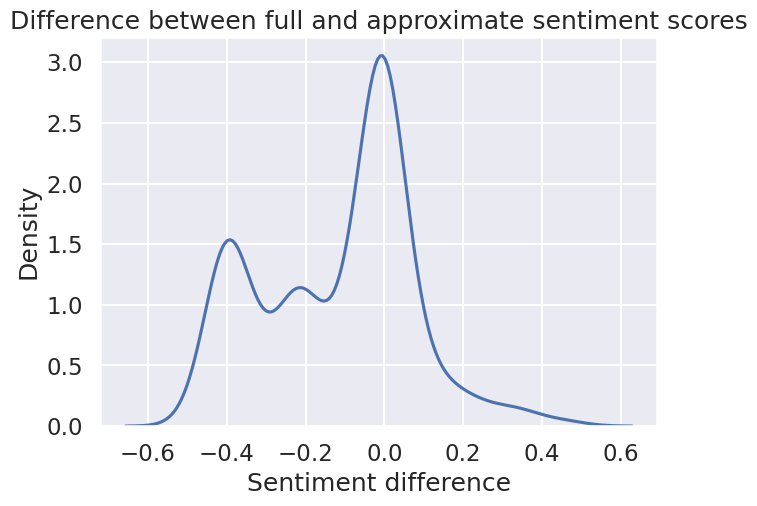

In [30]:
sns.kdeplot(msft_scores_2010['sentiment_difference'])
plt.xlabel('Sentiment difference')
plt.title('Difference between full and approximate sentiment scores');

Perhaps the article as a whole has a negative sentiment, as in if the market overall is trending downwards. However, even if the overall market trend is trending downwards, sometimes the Microsoft stock is individually performing well, or vice versa. Therefore, the overall sentiment of the article may not match the sentiment of the Microsoft mentions within that article.

<!-- END QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Sonia says congratulations! You have finished Homework 3!

<img src = "images/sonia.jpg" width = "200">

### Course Content Feedback

If you have any feedback about this assignment or about any of our other weekly, weekly assignments, lectures, or discussions, please fill out the [Course Content Feedback Form](https://docs.google.com/forms/d/e/1FAIpQLSe0fBEJwt6aEfZxU3fh3llNk8rSWHj6Umq0km3wPqmFu0MlGA/viewform). Your input is valuable in helping us improve the quality and relevance of our content to better meet your needs and expectations!

### Submission Instructions

Below, you will see a cell. Running this cell will automatically generate a zip file with your autograded answers. Once you submit this file to the HW 3 Coding assignment on Gradescope, Gradescope will automatically submit a PDF file with your written answers to the HW 3 Written assignment. If you run into any issues when running this cell, feel free to check this [section](https://ds100.org/debugging-guide/autograder_gradescope/autograder_gradescope.html#why-does-grader.exportrun_teststrue-fail-if-all-previous-tests-passed) in the Data 100 Debugging Guide.

**Important**: Please check that your written responses were generated and submitted correctly to the HW 3 Written Assignment.

**You are responsible for ensuring your submission follows our requirements and that the PDF for HW 3 written answers was generated/submitted correctly. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with submission, please don't hesitate to reach out to staff prior to the deadline.


## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [31]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q1a results: All test cases passed!

    q1b results: All test cases passed!

    q1c results: All test cases passed!

    q2a results: All test cases passed!

    q2b results: All test cases passed!

    q2c results: All test cases passed!

    q2di results: All test cases passed!

    q3ai results: All test cases passed!

    q3aii results: All test cases passed!

    q3b results: All test cases passed!

    q3ci results: All test cases passed!
